In [73]:
import os
import re
import random
import logging
import json
import csv
import numpy as np
from pprint import pprint
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [29]:
# Data location
data_dir = "../../../data/"
models_dir = "../../../models/"
fname = "donorschooseorg_challenge_project-10.csv"

In [30]:
teachers = defaultdict(list)
with open(os.path.join(data_dir, fname)) as csvfile:
    recreader = csv.reader(csvfile, delimiter=',', quotechar='"')
    lc = 0
    for line in recreader:
        if lc == 0:
            lc+=1
            continue
        teacher_dict = { "title": line[2],
                        "essay1": line[3],
                        "essay2": line[4],
                        "school": line[14],
                        "posted_date": line[6],
                        "funded_date": line[7],
                        "project_id": line[1],
                        "subj_cat": line[9],
                        "subj_subcat": line[10],
                        "grade_cat": line[11],
                        "resc_type": line[12],
                       }
        teachers[line[13]].append(teacher_dict)

In [49]:
t = [] 
orig_docs = []
for teacher in teachers:
    t.append(teacher)
    all_text = []
    for rec in teachers[teacher]:
        text_piece = rec["title"].strip().lower().split() + rec["essay1"].strip().lower().split() + rec["essay2"].strip().lower().split()
        text_piece.append("_".join(rec["subj_cat"].strip().lower().split()))
        text_piece.append("_".join(rec["subj_subcat"].strip().lower().split()))
        text_piece.append("_".join(rec["grade_cat"].strip().lower().split()))
        text_piece.append("_".join(rec["resc_type"].strip().lower().split()))
    all_text += text_piece
    orig_docs.append(" ".join(all_text))

In [50]:
vectorizer = TfidfVectorizer(stop_words=u'english', ngram_range=(1,1), max_features=25000)
# Transform the input features
docs = vectorizer.fit_transform(orig_docs)

In [51]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [55]:
# Enter the teacher id
teacher_id = "3d0febc07999810977702a6e936b4fb7"
teacher_id = random.choice(t)
teacher_index = t.index(teacher_id)

In [56]:
print(teacher_index)
# print(teachers[t[teacher_index]])
print(orig_docs[teacher_index])

19332
home reading program for ell students when my students start to learn how to read, i encourage them to borrow my books to read with a parent. many of my students are ell, so sending home children's books that are dual language or in spanish can make it feasible for their parents to enjoy and support their child's reading practice. my students are usually 5-6 year-olds who are eager to learn. they typically are excited about learning to read and want to share their new skills with their families. to help with this, i send home a book every night for my students to borrow and read to their parents. many of my students are ell and their parents often know some english, but it is difficult for them to support their children's home reading practice if all the books their child brings home are only in english. my school's student population are mostly from very low income families that usually don't have any or many children's books at their homes. this is one reason i give each of my 

In [57]:
# you only needs to do this once, this is a mapping of index to 
feature_names=vectorizer.get_feature_names()
 
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(docs[teacher_index].tocoo())

#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,10)
 
# now print the results
print("\n===Keywords===")
for k in keywords:
    print(k,keywords[k])
 


===Keywords===
ell 0.341
home 0.284
borrow 0.276
usually 0.231
books 0.228
parents 0.221
read 0.22
feasible 0.176
birthday 0.174
children 0.166


In [58]:
from wordcloud import WordCloud

In [84]:
wc = WordCloud(background_color="white", max_words=2000, width = 2048,height = 720)

In [85]:
keywords=extract_topn_from_vector(feature_names,sorted_items,100)
weights = {k: keywords[k] for k in keywords}

In [88]:
# Global configuration for matplotlib figures
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['figure.facecolor'] = '#FFFFFF00'
plt.rcParams['axes.facecolor'] = '#FF00000F'
plt.rcParams['font.family'] = "Open Sans"

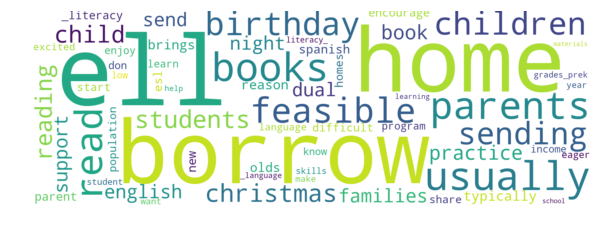

In [89]:
wc.generate_from_frequencies(weights)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()